# **Analyzing Indian Start-Up Funding Trends (2018 - 2021)**

----

### Team: Team Namibia
#### Author: Brian Siaw

## Table of Contents


[**Business Understanding**](#Step-1:-Business-Understanding)

[**Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Data Preparation**](#Check-Data-Quality)

[**Hypothesis Testing**](#hypothesis-testing)

[**Exploratory Data Analysis**](#exploratory-data-analysis)

[**Analytical Questions**](#analytical-questions)
 



## Step 1: Business Understanding
Team Namibia aims to venture into the start-up space in India and being the data expert of the team, we've have been tasked with investigating the econmoic landscape and coming out with a course of action for this endeavour.


#### Problem Statement:
Investigating the dynamics of startup funding in India over the period from 2018 to 2021. The aim is to understand the trends, sector preferences, investment stages, key investors, and geographical distribution of the funding. Additionally, if there have been significant differences in funding amounts across different years and sectors, it can guide the action plan to be taken.

#### Objective
The goal of this analysis is to provide insights into the startup funding landscape in India from 2018 to 2021. 
- Identify trends and patterns in funding amounts over the years.
- Determine which sectors received the most funding and how sector preferences changed over time.
- Understand the distribution of funding across different stages of startups (e.g., Seed, Series A).
- Identify key investors and their investment behaviors.
- Analyze the geographical distribution of funding within India.

#### Business Analytical Questions
1. What are the trends and patterns in funding amounts for startups in India beetween 2018 to 2021?
   - Analyzing the annual and quarterly trends in funding can reveal patterns and growth trajectories. Look for peaks, dips, and any consistent growth patterns over these years.
2. Which sectors received the most funding, and how did sector preferences change over time from 2018 to 2021?
   - Identifying which industries or sectors received the most funding can show sectoral preferences and shifts. Understanding how this distribution has evolved over the years can highlight emerging trends and declining interests.
3. How is the distribution of funding across different stages of startups (e.g., Seed, Series A)?
   - Analyzing the funding amounts at different startup stages can provide insights into the investment appetite at various growth phases. It can also help in understanding the maturity and risk preference of investors.
4. Who are the key investors in Indian startups, and what are their investment behaviors/patterns?
   - Identifying the most active investors and analyzing their investment portfolios can shed light on key players in the ecosystem. Understanding their investment patterns can also reveal strategic preferences and alliances.
5. What is the geographical distribution of startup funding within India, and how has this distribution changed over the years 2018 to 2021?
   - Analyzing the geographical distribution of startup funding can show regional hotspots for entrepreneurship and investment. Observing how this has changed over the years can reveal shifts in regional focus and development.



### Null Hypothesis (H0)
There is no significant difference in the funding amounts for startups in India between the years 2018 and 2021 across different sectors.

### Alternate Hypothesis (H1)
There is a significant difference in the funding amounts for startups in India between the years 2018 and 2021 across different sectors.


## Step 2: Data Understanding

The data from 2018 is obtained from GitHub in csv format, 2019 data is obtained from google drive in csv format and 2020 to 2021 data is obtained from an SQL database.

### Load Data

#### Install pyodbc and python-dotenv if necessary

In [1]:
# For creating a connection
!pip install pyodbc 

# For loading environment variables
!pip install python-dotenv  

# For creating visualizations
!pip install matplotlib
!pip install seaborn

# For statistical model analysis
!pip install statsmodels

#### Import the necessary packages

In [2]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 
import numpy as np

# Import Matplotlib for  visualizations in Python
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

# Import re for string manipulation (searching, matching, and modifying strings based on specific patterns)
import re

# Import for statistical model analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Establishing a connection to the SQL database

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get('database')
server = environment_variables.get('server')
username = environment_variables.get('login')
password = environment_variables.get('password')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

#### Load 2020 Data

In [5]:
query1 = 'Select * from dbo.LP1_startup_funding2020'
df_2020 = pd.read_sql(query1, connection)
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Load 2021 Data

In [6]:
query2 = 'Select * from dbo.LP1_startup_funding2021'
df_2021 = pd.read_sql(query2, connection)
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### Load 2018 Data

In [7]:
df_2018 = pd.read_csv(r'\\Mac\Home\Downloads\Analysis-of-Indian-Startup-Funding\team namibia\tn dataset\startup_funding2018.csv')
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


#### Load 2019 Data

In [8]:
df_2019 = pd.read_csv(r'\\Mac\Home\Downloads\Analysis-of-Indian-Startup-Funding\team namibia\tn dataset\startup_funding2019.csv')
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Rename the columns to match for easier consolidation

In [9]:
# Rename 2018 column: 'Round/Series' to 'Funding Stage'
df_2018 = df_2018.rename(columns = {'Round/Series': 'Funding Stage'})

# Rename 2019 columns
df_2019 = df_2019.rename(columns = {'Company/Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'Amount($)': 'Amount', 'HeadQuarter': 'Location', 'What it does': 'About Company', 'Founded': 'Year Founded'})

# Rename 2020 columns
df_2020 = df_2020.rename(columns = {'Company_Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'HeadQuarter': 'Location', 'What_it_does': 'About Company', 'Founded': 'Year Founded'})

# Rename 2021 columns
df_2021 = df_2021.rename(columns = {'Company_Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'HeadQuarter': 'Location', 'What_it_does': 'About Company', 'Founded': 'Year Founded'})

#### Save all the data in one DataFrame

In [10]:
# Add a column to each DataFrame to indicate the year
df_2018['Year Funded'] = 2018
df_2019['Year Funded'] = 2019
df_2020['Year Funded'] = 2020
df_2021['Year Funded'] = 2021

# Concatenate all DataFrames into one master DataFrame
df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

# Print out the new DataFrame to confirm the combination was done correctly
df.head()

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2879 non-null   object 
 1   Industry       2861 non-null   object 
 2   Funding Stage  1941 non-null   object 
 3   Amount         2622 non-null   object 
 4   Location       2765 non-null   object 
 5   About Company  2879 non-null   object 
 6   Year Funded    2879 non-null   int64  
 7   Year Founded   2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2253 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


### Data Preparation

#### Initial Observations:
- Some null values are presented as '-'
- Duplicates are presented
- Errors in data entry (some entries are in the wrong columns)
- The 'Location' and 'Industry' columns contains multiple values
- Columns renamed
- A new column 'Year Funded' was created to represented the year the companies were received funding
- 2018 Data has no data in the following columns: 'Year Founded', 'Founders', 'Investor'
- Datatype correction required in the 'Amount' column
- Multiple currencies found in the 'Amount' column: Dollars and Rupees


#### Cleaning Overview:
- Duplicates removed
- The Rupees in the 'Amount' column was converted to Dollars
- Using dictionaries to correct for wrongly placed data
- The 'Location' column was split into 3 columns (City, State and Country)
    - 'State' and 'Country' column was removed 
    - The 'City' column was joined to the dataset and renamed to 'Location' while the intial 'Location' column was removed.
    - 4 rows with 'Location' as 'India, Asia' was removed
- The 'Industry' column was split into multiple columns. All the columns were removed except the one with no null values.
- In the 'Company' name column a link was changed to the company's name.


In [12]:
# Check for the number of rows and columns (shape)
df.shape

(2879, 11)

#### Review and Remove Duplicates

In [13]:
# Check for duplicates
df.duplicated().sum()

23

In [14]:
# Check for duplicates
duplicates = df.duplicated(keep = False)

# Review the duplicates
dupes = df[duplicates]
dupes.head()

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
735,Nykaa,Cosmetics,None,NaN,Mumbai,Nykaa is an online marketplace for different b...,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif",None
744,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",None
760,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",None
820,Nykaa,Cosmetics,None,NaN,Mumbai,Nykaa is an online marketplace for different b...,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif",None
941,Byju’s,EdTech,None,500000000.0,Bangalore,An Indian educational technology and online tu...,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management",None
977,Byju’s,EdTech,None,500000000.0,Bangalore,An Indian educational technology and online tu...,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management",None
1764,Curefoods,Food & Beverages,None,$13000000,Bangalore,Healthy & nutritious foods and cold pressed ju...,2021,2020.0,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",NaN
1766,Bewakoof,Apparel & Fashion,None,$8000000,Mumbai,Bewakoof is a lifestyle fashion brand that mak...,2021,2012.0,Prabhkiran Singh,InvestCorp,NaN


In [15]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm the new shape. Rows should be less by 23
df.shape

(2856, 11)

#### Clean rows with misplaced column entires

- Check for values in the columns to identify some of the misplaced data
- Select the rows with the values identified as misplaced
- Investigate the other entires in the rows for further insight
- Create dictionaries to correct the data


In [16]:
# Find unique values in the 'Funding Stage' column
unique_fundstage_values = df['Funding Stage'].unique()

# Print the unique values
print(unique_fundstage_values)

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed funding' 'Seed fund' 'Series F' 'Series B+'
 'Seed round' 'Pre-series A' None 'Pre-seed' 'Pre-series' 'Debt'
 'Pre-series C' 'Pre-series B' 'Bridge' 'Series B2' 'Pre- series A' 'Edge'
 'Pre-Series B' 'Seed A' 'Series A-1' 'Seed Funding' 'Pre-seed Round'
 'Seed Round & Series A' 'Pre Series A' 'Pre seed Round' 'Angel Round'
 'Pre series A1' 'Series E2' 'Seed Round' 'Bridge Round' 'Pre seed round'
 'Pre series B' 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series'
 'Series C, D' '$1200000' 'Seed+' 'Series F2' 'Series A+' 'S

In [17]:
# Define the specific entries you want to look up
specific_fundstage_entries = ['https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'Edge', 'PE', '$1200000', '$300000', '$6000000', '$1000000']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_fundstage_rows = df[df['Funding Stage'].isin(specific_fundstage_entries)]
specific_fundstage_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...,2018,NaN,NaN,NaN,NaN
1022,EkAnek,Tech Startup,Edge,5040000.0,New Delhi,EkAnek Networks is a new startup that is focus...,2020,2018.0,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India",None
1768,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta",NaN
2114,boAt,Fashion & Lifestyle,PE,"$100,000,000",Mumbai,boAt is a lifestyle brand that deals in fashio...,2021,2016.0,"Aman Gupta, Sameer Mehta","InnoVen Capital, InnoVen Capita",NaN
2208,Little Leap,EdTech,$300000,ah! Ventures,New Delhi,Soft Skills that make Smart Leaders,2021,2020.0,Holistic Development Programs for children in ...,Vishal Gupta,NaN
2221,BHyve,Human Resources,$300000,"ITO Angel Network, LetsVenture",Mumbai,A Future of Work Platform for diffusing Employ...,2021,2020.0,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",NaN
2344,MYRE Capital,Commercial Real Estate,$6000000,None,Mumbai,Democratising Real Estate Ownership,2021,2020.0,Own rent yielding commercial properties,Aryaman Vir,NaN
2347,Saarthi Pedagogy,EdTech,$1000000,"JITO Angel Network, LetsVenture",Ahmadabad,"India's fastest growing Pedagogy company, serv...",2021,2015.0,Pedagogy,Sushil Agarwal,NaN


In [18]:
# Find unique values in the 'Location' column
unique_location_values = df['Location'].unique()

# Print the unique values
print(unique_location_values)

['Bangalore, Karnataka, India' 'Mumbai, Maharashtra, India'
 'Gurgaon, Haryana, India' 'Noida, Uttar Pradesh, India'
 'Hyderabad, Andhra Pradesh, India' 'Bengaluru, Karnataka, India'
 'Kalkaji, Delhi, India' 'Delhi, Delhi, India' 'India, Asia'
 'Hubli, Karnataka, India' 'New Delhi, Delhi, India'
 'Chennai, Tamil Nadu, India' 'Mohali, Punjab, India'
 'Kolkata, West Bengal, India' 'Pune, Maharashtra, India'
 'Jodhpur, Rajasthan, India' 'Kanpur, Uttar Pradesh, India'
 'Ahmedabad, Gujarat, India' 'Azadpur, Delhi, India'
 'Haryana, Haryana, India' 'Cochin, Kerala, India'
 'Faridabad, Haryana, India' 'Jaipur, Rajasthan, India'
 'Kota, Rajasthan, India' 'Anand, Gujarat, India'
 'Bangalore City, Karnataka, India' 'Belgaum, Karnataka, India'
 'Thane, Maharashtra, India' 'Margão, Goa, India'
 'Indore, Madhya Pradesh, India' 'Alwar, Rajasthan, India'
 'Kannur, Kerala, India' 'Trivandrum, Kerala, India'
 'Ernakulam, Kerala, India' 'Kormangala, Karnataka, India'
 'Uttar Pradesh, India, Asia' 'Andhe

In [19]:
# Define the specific entries you want to look up
specific_location_entries = ['Computer Games', 'Online Media\t#REF!', 'Information Technology & Services', 'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_location_rows = df[df['Location'].isin(specific_location_entries)]
specific_location_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
1768,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta",NaN
1911,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,A ready-to-cook Asian cuisine brand,2021,2020.0,"Vidur Kataria, Sidhanth Madan",WEH Ventures,NaN
1912,Fullife Healthcare,Primary Business is Development and Manufactur...,None,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000,NaN
1927,MoEVing,MoEVing is India's only Electric Mobility focu...,None,Seed,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021.0,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN
2770,Sochcast,Sochcast is an Audio experiences company that ...,None,None,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020.0,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN
2846,Peak,"Manchester, Greater Manchester",Series C,$75000000,Information Technology & Services,Peak helps the world's smartest companies put ...,2021,2014.0,Atul Sharma,SoftBank Vision Fund 2,NaN


In [20]:
# Find unique values in the 'Industry' column
unique_industry_values = df['Industry'].unique()

# Print the unique values
print(unique_industry_values)

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting

In [21]:
# Define the specific entries you want to look up
specific_industry_entries = ['Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience', 'Hauz Khas', 'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.',"MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.", 'Manchester, Greater Manchester']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_industry_rows = df[df['Industry'].isin(specific_industry_entries)]
specific_industry_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
1911,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,A ready-to-cook Asian cuisine brand,2021,2020.0,"Vidur Kataria, Sidhanth Madan",WEH Ventures,NaN
1912,Fullife Healthcare,Primary Business is Development and Manufactur...,None,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000,NaN
1927,MoEVing,MoEVing is India's only Electric Mobility focu...,None,Seed,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021.0,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN
2770,Sochcast,Sochcast is an Audio experiences company that ...,None,None,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020.0,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN
2846,Peak,"Manchester, Greater Manchester",Series C,$75000000,Information Technology & Services,Peak helps the world's smartest companies put ...,2021,2014.0,Atul Sharma,SoftBank Vision Fund 2,NaN


In [22]:
# Define the specific entries you want to look up
specific_amount_entries = ['Seed', 'Pre-series A']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_amount_rows = df[df['Amount'].isin(specific_amount_entries)]
specific_amount_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
1927,MoEVing,MoEVing is India's only Electric Mobility focu...,None,Seed,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021.0,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN
2215,AdmitKard,EdTech,None,Pre-series A,Noida,A tech solution for end to end career advisory...,2021,2016.0,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,NaN
2818,Godamwale,Logistics & Supply Chain,None,Seed,Mumbai,Godamwale is tech enabled integrated logistics...,2021,2016.0,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,NaN


In [23]:
# Updating specific indexes with correct values (Funding Stage)
df.at[1927, 'Funding Stage'] = 'Seed'
df.at[2215, 'Funding Stage'] = 'Pre-series A'
df.at[2818, 'Funding Stage'] = 'Seed'

# Updating specific indexes with correct values (Amount) 
df.at[1927, 'Amount'] = 5000000
df.at[2215, 'Amount'] = 1000000
df.at[2818, 'Amount'] = 1000000
df.at[1912, 'Amount'] = 22000000

In [24]:
# Define the replacement dictionary for 'Industry' column
industry_replacements = {
    'Manchester, Greater Manchester': 'Information Technology & Services',
    'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience': 'Audio',
    'Hauz Khas': 'Food & Beverages',
    'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.': 'Healthcare',
    "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.": 'Transportation'
}

# Define the replacement dictionary for 'Funding Stage' column
funding_stage_replacements = {
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593': np.nan,
    'Edge': np.nan,
    '$1200000': np.nan,
    'PE': np.nan,
    '$300000': np.nan,
    '$300000': 'Angel',
    '$6000000': np.nan,
    '$1000000': 'Angel'   
}

# Define the replacement dictionary for 'Amount' column
amount_replacements = {
    'Upsparks': np.nan,
    'ah! Ventures': 300000,
    'ITO Angel Network, LetsVenture': 300000,
    'None': np.nan,
    'JITO Angel Network, LetsVenture': 1000000
}

# Define replacement dictionary for 'Location' column
location_replacements = {
    'Online Media\t#REF!': np.nan,
    'Information Technology & Services': np.nan,
    'Food & Beverages': np.nan,
    'Pharmaceuticals\t#REF!': np.nan,
    'Gurugram\t#REF!': 'Gurugram',
    'Computer Games': np.nan

}

# Define replacement dictionary for 'Investor' column
investor_replacements = {
    '$Undisclosed': np.nan,
    '$22000000': np.nan,
    '$5000000': np.nan,
    '$1000000': np.nan,
    '1000000\t#REF!': np.nan
}


# Apply replacements
df['Industry'] = df['Industry'].replace(industry_replacements)
df['Funding Stage'] = df['Funding Stage'].replace(funding_stage_replacements)
df['Amount'] = df['Amount'].replace(amount_replacements)
df['Location'] = df['Location'].replace(location_replacements)
df['Investor'] = df['Investor'].replace(investor_replacements)

In [25]:
# Perform a random selection to check for misplaced data
# Select 80% of the rows randomly
random_rows = df.sample(frac=0.8)
random_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
1750,Uable,EdTech,Pre-series A,"$35,000,000",Bangalore,Uable are on a bold mission to redefine the fu...,2021,2020.0,Saurabh Saxena,"JAFCO Asia, Chiratae Ventures",NaN
911,Public,Social Media,None,30000000.0,New Delhi,Video-led social app Public provides users wit...,2020,2019.0,Azhar Iqubal,"Lee Fixel's Addition, SIG Global, Tanglin Vent...",None
2291,F5,Food & Beverages,Pre-series A,$300000,New Delhi,F5 is a foods and beverages company.,2021,2018.0,"Lalit Aggarwal, Raghav Arora","Venture Catalysts, Jeevak Gupta",NaN
1016,ClanConnect,Marketing startup,Seed,600000.0,Delhi,AI-driven influencer marketing platform ClanCo...,2020,NaN,"Kunal Kishore Sinha, Sagar Pushp",None,None
1677,Qube Health,HealthTech,Pre-series A,Undisclosed,Mumbai,India's Most Respected Workplace Healthcare Ma...,2021,2016.0,Gagan Kapur,Inflection Point Ventures,NaN
...,...,...,...,...,...,...,...,...,...,...,...
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
2015,Hypd Store,Content commerce,Pre-seed,Undisclosed,New Delhi,"A shop worthy content platform, personalized!",2021,2020.0,"Ashwarya Garg, Akshay Bhatnagar",ScoopWhoop,NaN
676,Swipez,FinTech,None,NaN,Pune,Swipez is a payment collection platform.,2020,2014.0,Vivek Iyer,"9Unicorns, Anicut",None
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN,NaN


In [25]:
# Get the summary of the DataFrame (understand structure and contents of the dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2856 non-null   object 
 1   Industry       2838 non-null   object 
 2   Funding Stage  1925 non-null   object 
 3   Amount         2599 non-null   object 
 4   Location       2737 non-null   object 
 5   About Company  2856 non-null   object 
 6   Year Funded    2856 non-null   int64  
 7   Year Founded   2088 non-null   float64
 8   Founders       2312 non-null   object 
 9   Investor       2227 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 332.3+ KB


#### Clean the 'Amount' Column 

- Extract all the symbols and non-numeric values
- Convert Rupees to Dollars
- Drop all non-numeric values and replace them with NaN values
- Convert column to float

In [26]:
# Extract and count currency symbols
currency_counts = df['Amount'].str.extract(r'([^0-9.,]+)')[0].value_counts()
currency_counts

0
$               1176
—                148
₹                144
$Undisclosed      72
Undisclosed       55
$undisclosed      22
$$                 2
Name: count, dtype: int64

#### Convert Rupees to Dollars

In [27]:
# Filter the DataFrame based on the rupee symbol and the year 2018
rupee_2018 = df['Amount'].str.contains('₹', na=False) & (df['Year Funded'] == 2018)

# Perform the calculation only for the filtered rows
df.loc[rupee_2018, 'Amount'] = df.loc[rupee_2018, 'Amount'].str.replace('₹', '').str.replace(',', '').astype(float) * 0.01461   # 1 INR = 0.01461 USD in 2018

In [28]:
# Confirm all rupees have been dropped
currency_counts = df['Amount'].str.extract(r'([^0-9.,]+)')[0].value_counts()
currency_counts

0
$               1176
—                148
$Undisclosed      72
Undisclosed       55
$undisclosed      22
$$                 2
Name: count, dtype: int64

In [29]:
# Convert the 'Amount' column datatype
# Extract unique currency symbols from the 'Amount' column
currency_symbols = df['Amount'].str.extract(r'([^0-9.,])').dropna()[0].unique()

# Print the unique currency symbols
print("Unique Currency Symbols:", currency_symbols)

Unique Currency Symbols: ['—' '$' 'U']


In [30]:
# Remove non-numeric characters from the 'Amount' column
df['Amount'] = df['Amount'].str.replace(r'[$-,U]', '').str.replace(',', '')

# Convert the cleaned strings into numeric values, replacing non-convertible values with NaN
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Convert the 'Amount' column datatype
df['Amount'] = df['Amount'].astype(float)

# Confirm the datatype change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2856 non-null   object 
 1   Industry       2838 non-null   object 
 2   Funding Stage  1925 non-null   object 
 3   Amount         174 non-null    float64
 4   Location       2737 non-null   object 
 5   About Company  2856 non-null   object 
 6   Year Funded    2856 non-null   int64  
 7   Year Founded   2088 non-null   float64
 8   Founders       2312 non-null   object 
 9   Investor       2227 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 332.3+ KB


Fill the nulls with the determined Industries (obtained from the "About Company" column)

In [31]:
# Mapping of company names to industries
company_to_industry = {
    "VMate": "Media and Entertainment",
    "Awign Enterprises": "Services (Human Resources)",
    "TapChief": "Services (Consulting / Professional Services)",
    "KredX": "Financial Services",
    "m.Paani": "E-Commerce",
    "Text Mercato": "E-Commerce",
    "Magicpin": "E-Commerce",
	"Leap Club": "E-Commerce",
	"Juicy Chemistry": "Services",
	"Servify": "Retail",
	"Wagonfly": "Media and Entertainment",
	"DrinkPrime": "E-Commerce",
	"Kitchens Centre": "Consumer Durables",
	"Innoviti": "Services",
	"Brick&Bolt": "Financial Services",
	"Toddle": "Real Estate",
	"HaikuJAM": "IT & BPM",
    "MissMalini Entertainment" : "Entertainment and Media",
    "Jagaran Microfin" : "Microfinance",
    "FLEECA" : "Automotive Services",
    "WheelsEMI" : "Financial Services",
    "Fric Bergen" : "Food and Beverage",
    "Deftouch" : "Gaming",
    "Corefactors" : "Marketing",
    "Cell Propulsion" : "Transportation Technology",
    "Flathalt" : "Real Estate",
    "dishq" : "Food Technology",
    "Trell" : "Social Networking",
    "HousingMan.com" : "Real Estate",
    "Steradian Semiconductors" : "Semiconductor Technology",
    "SaffronStays" : "Travel and Hospitality",
    "Inner Being Wellness" : "Beauty and Wellness",
    "MySEODoc" : "Digital Marketing",
    "ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED" : "Digital Marketing",
    "Scale Labs" : "E-commerce Solutions",
    "Roadcast" : "Business Services",
    "Toffee" : "Insurance Technology",
    "ORO Wealth" : "Financial Services",
    "Finwego" : "Financial Services",
    "Cred" : "Financial Services",
    "Origo" : "Agriculture",
    "Sequretek" : "Cyber Security",
    "Avenues Payments India Pvt. Ltd." : "IT Solutions",
    "Planet11 eCommerce Solutions India (Avenue11)" : "Technology",
    "Iba Halal Care" : "Cosmetics",
    "Togedr" : "Activity Discovery and Booking",
    "Scholify" : "Edutech"    
}

# Function to fill missing industries based on company name
def fill_industry(row):
    if pd.isna(row["Industry"]):
        return company_to_industry.get(row["Company Name"], row["Industry"])
    return row["Industry"]

# Apply the function to update the 'Industry' column
df["Industry"] = df.apply(fill_industry, axis=1)

# Checking the Null value in the 'Industry' column
print("Null values in Industry after cleaning:",df['Industry'].isna().sum())

Null values in Industry after cleaning: 0


Extract 1 Industry from the 'Industry' column

In [32]:
# Function to extract the first industry from the 'Industry' column
def industry_extract(row):
    industries = row['Industry'].split(',')
    return industries[0].strip() if len(industries) > 1 else row['Industry']

# Apply the function to update the 'Industry' column
df['new_industry'] = df.apply(industry_extract, axis=1)
    
# Remove "Industry"
df = df.drop(columns=['Industry'])

# Rename "new_industry" to "Industry"
df = df.rename(columns={'new_industry': 'Industry'})

df[["Industry"]].head()

,Industry
0,Brand Marketing
1,Agriculture
2,Credit
3,Financial Services
4,E-Commerce Platforms


In [33]:
unique_industries= df["Industry"].unique()
unique_industries

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [34]:
def sector_redistribution(Industry):
    if re.search(r'bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|microfinance|lending|wealth|insurance|mutual fund|funding|invest|neo-bank|online financial service|financial servives|escrow', Industry, re.IGNORECASE):
        return 'Finance and FinTech'
    elif re.search(r'e-?commerce|retail|marketplace|D2C startup|Clothing|Consumer Goods|Foootwear|Arts & Crafts|B2B Travel|B2B startup|Commerce|D2C|Merchandise|D2C Business|Content commerce|Wholesale|Estore|Lifestyle|B2B service|E store|E-market|Reatil startup|Social commerce|FMCG|e-store|e-tail|Entreprenurship|e-tailer|Commercial|consumer|durables|B2B|Wedding|appliances|electronics', Industry, re.IGNORECASE):
        return 'E-Commerce and Retail'
    elif re.search(r'marketing|advertising|brand|digital marketing|sales|customer loyalty|creative agency|content management', Industry, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'agriculture|agtech|agr[iy]tech|Fishery|food|beverage|Milk startup|Craft Beer|Farming|catering|cooking|dairy|QSR startup|nutrition|soil', Industry, re.IGNORECASE):
        return 'Agriculture and Food'
    elif re.search(r'health|medical|biotech|Eye Wear|Hygiene|Beauty products|Cultural|Matrimony|pharma|Eyeglasses|Hygiene management|Biomaterial startup|Work fulfillment|medtech|care|diagnostics|Cosmetics|Dental|Dietary Supplements|Basketball|wellness|fitness|personal care|Beauty|skincare|mental health|life science|alternative medicine|veterinary', Industry, re.IGNORECASE):
        return 'Healthcare and Wellness'
    elif re.search(r'transport|automotive|Aeorspace|Aviation & Aerospace|Aviation|Automobile|Aero company|Automobiles|Tyre management|vehicle|logistics|delivery|air transport|Business Travel|mobility|car|Aerospace|bike|EV|auto-tech|transportation', Industry, re.IGNORECASE):
        return 'Transportation and Mobility'
    elif re.search(r'real estate|construction|Deisgning|Home services|interior|Rental space|Home Design|Accomodation|housing|home decor|commercial real estate|Rental|co-?working|co-?living', Industry, re.IGNORECASE):
        return 'Real Estate and Construction'
    elif re.search(r'media|entertainment|broadcasting|Translation & Localization|Advertisement|Content creation|Online storytelling|OTT|Blogging|Social audio|Mobile Games|Podcast|Social network|Content publishing|streaming|E-connect|Content Marktplace|News|Social Network|Publication|Dating app|Dating|Games|video|music|gaming|sports|3D Printing|Classifieds|Audio|digital entertainment|visual media', Industry, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'education|e-?learning|edtech|training|Reading Apps|continuing education|career planning|Children|edutech', Industry, re.IGNORECASE):
        return 'Education'
    elif re.search(r'renewable|clean energy|Pollution control equiptment|waste management|solar|environmental|energy|cleantech|sanitation', Industry, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'consulting|business services|CRM|Company-as-a-Service|Innovation management|Taxation|Advisory firm|Innovation Management|Services|HR|Consultancy|FM|Multinational conglomerate company|Services (Human Resources)|professional services|Collaboration|market research|Travel|Tourism|Analytics|Human Resources|customer service|legal|Government|Business Intelligence|facility|IT & BPM', Industry, re.IGNORECASE):
        return 'Professional Services'
    elif re.search(r'information technology|Drone|IT|NFT|Enterprise Resource Planning (ERP)|TaaS startup|Computer Games|Telecommuncation|Telecommunications|Data Analytics|Location Analytics|Data Intelligence|tech|Nano Distribution Network|AR/VR|AR/VR startup|PaaS startup|Startup laboratory|Service industry|AR startup|Telecommunication|Apps|Online Portals|Job portal|Photonics startup|Scanning app|Online Games|Search Engine|Embedded Systems|Fraud Detection|File Sharing|Computer|Android|Enterprise Resource Planning (ERP)|Artificial Intelligence|technology|Mobile|Information Services|Mobile Payments|internet|cloud|internet of things|iot|big data|saas|cyber security|software|ai|machine learning|robotics|deep tech|data science|api|digital|platform|networking|smart cities', Industry, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'consumer goods|consumer applications|consumer durables|consumer electronics|consumer appliances|eyewear|jewellery|fashion', Industry, re.IGNORECASE):
        return 'Consumer Goods'
    elif re.search(r'industrial|manufacturing|Appliance|Water purification|Product studio|Design|Textiles|Defense & Space|Business Supplies & Equipment|Cannabis startup|Tobacco|automation|Warehouse|Battery design|Battery manufacturer|WL & RAC protection|industrial automation|Battery|packaging', Industry, re.IGNORECASE):
        return 'Industrial and Manufacturing'
    else:
        return Industry
    
# Apply the function to update the 'Industry' column
df['Industry'] = df["Industry"].apply(sector_redistribution)

# Find unique values in the "Industry" column
unique2= df["Industry"].unique()

# Check for number of unique values in the "Industry" column
print(f"New Number of unique Industries: {len(unique2)}")

New Number of unique Industries: 16


In [35]:
new_unique_industries = df["Industry"].unique()
new_unique_industries

array(['Marketing and Advertising', 'Agriculture and Food',
       'Finance and FinTech', 'Professional Services',
       'E-Commerce and Retail', 'Technology',
       'Industrial and Manufacturing', 'Transportation and Mobility',
       'Education', 'Energy and Environment', 'Healthcare and Wellness',
       'Media and Entertainment', '—', 'Consumer Goods',
       'Real Estate and Construction',
       'Enterprise Resource Planning (ERP)'], dtype=object)

In [36]:
# Define the specific entries you want to look up
entry = ['—', 'Enterprise Resource Planning (ERP)']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
results = df[df['Industry'].isin(entry)]
results

,Company Name,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10,Industry
58,MissMalini Entertainment,Seed,NaN,"Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...,2018,NaN,NaN,NaN,NaN,—
105,Jagaran Microfin,Debt Financing,NaN,"Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...,2018,NaN,NaN,NaN,NaN,—
121,FLEECA,Seed,NaN,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.,2018,NaN,NaN,NaN,NaN,—
146,WheelsEMI,Series B,NaN,"Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI...",2018,NaN,NaN,NaN,NaN,—
153,Fric Bergen,Venture - Series Unknown,NaN,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...,2018,NaN,NaN,NaN,NaN,—
155,BuildSupply,Series A,NaN,"Gurgaon, Haryana, India",India’s most advanced ERP system for the real ...,2018,NaN,NaN,NaN,NaN,Enterprise Resource Planning (ERP)
174,Deftouch,Seed,NaN,"Bangalore, Karnataka, India",Deftouch is a mobile game development company ...,2018,NaN,NaN,NaN,NaN,—
181,Corefactors,Seed,NaN,"Bangalore, Karnataka, India","Corefactors is a leading campaign management, ...",2018,NaN,NaN,NaN,NaN,—
210,Cell Propulsion,Seed,NaN,"Bangalore, Karnataka, India",Cell Propulsion is an electric mobility startu...,2018,NaN,NaN,NaN,NaN,—
230,Flathalt,Angel,50000.0,"Gurgaon, Haryana, India",FInd your Customized Home here.,2018,NaN,NaN,NaN,NaN,—


In [37]:
# Updating specific indexes with correct values (Industry)
df.at[58, 'Industry'] = 'Marketing and Advertising'
df.at[105, 'Industry'] = 'Finance and FinTech'
df.at[121, 'Industry'] = 'Transportation and Mobility'
df.at[146, 'Industry'] = 'Transportation and Mobility'
df.at[153, 'Industry'] = 'Agriculture and Food'
df.at[155, 'Industry'] = 'Technology'
df.at[174, 'Industry'] = 'Media and Entertainment'
df.at[181, 'Industry'] = 'Professional Services'
df.at[210, 'Industry'] = 'Transportation and Mobility'
df.at[230, 'Industry'] = 'Real Estate and Construction'
df.at[235, 'Industry'] = 'Agriculture and Food'
df.at[238, 'Industry'] = 'Professional Services'
df.at[242, 'Industry'] = 'Real Estate and Construction'
df.at[243, 'Industry'] = 'Industrial and Manufacturing'
df.at[247, 'Industry'] = 'Professional Services'
df.at[251, 'Industry'] = 'Healthcare and Wellness'
df.at[257, 'Industry'] = 'Marketing and Advertising'
df.at[258, 'Industry'] = 'Marketing and Advertising'
df.at[259, 'Industry'] = 'E-Commerce and Retail'
df.at[294, 'Industry'] = 'Professional Services'
df.at[325, 'Industry'] = 'Agriculture and Food'
df.at[326, 'Industry'] = 'Finance and FinTech'
df.at[346, 'Industry'] = 'E-Commerce and Retail'
df.at[398, 'Industry'] = 'Professional Services'
df.at[457, 'Industry'] = 'Industrial and Manufacturing'
df.at[472, 'Industry'] = 'Technology'
df.at[473, 'Industry'] = 'Technology'
df.at[476, 'Industry'] = 'E-Commerce and Retail'
df.at[478, 'Industry'] = 'Healthcare and Wellness'
df.at[480, 'Industry'] = 'Professional Services'
df.at[510, 'Industry'] = 'Education'

In [38]:
# Confirm change

# Define the specific entries you want to look up
entry = ['—', 'Enterprise Resource Planning (ERP)']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
results = df[df['Industry'].isin(entry)]
results

,Company Name,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10,Industry


#### Split and Clean the 'Location' Column

In [39]:
# Review column
df[["Location"]].head()

# All rows contains more than 2 or 3 variables
# They are in 2 format the format of:
    # district, city, country
    # country, continent

,Location
0,"Bangalore, Karnataka, India"
1,"Mumbai, Maharashtra, India"
2,"Gurgaon, Haryana, India"
3,"Noida, Uttar Pradesh, India"
4,"Hyderabad, Andhra Pradesh, India"


Split the column into 'State' and 'City', replace 'Location' with 'City' column and rename it as 'Location'

In [40]:
# Split the 'Location' column into multiple columns
location_split = df['Location'].str.rsplit(',', expand=True)

# Assign new column names to location split
location_split.columns = ['Capital', 'State', 'Country']

# Remove leading and trailing spaces in the 'State' and 'Country' columns
location_split['State'] = location_split['State'].str.strip()
location_split['Country'] = location_split['Country'].str.strip()

# Join the split columns back to the original DataFrame and remove the 'Location' column
df = df.drop(columns='Location').join(location_split)

# Rename the 'Capital' column to 'Location'
df = df.rename(columns={'Capital': 'Location'})

# Remove rows with no only "India, Asia"
df = df.drop(df[df["State"] == "Asia"].index)

# Delete the 'State' and 'Country' columns
df = df.drop(columns=['State', 'Country'])

df.head()

# We replaced the "Location" column with 'State' and 'Capital'
# We Removed the 4 rows with 'India,Asia' as location

,Company Name,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Industry,Location
0,TheCollegeFever,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN,Marketing and Advertising,Bangalore
1,Happy Cow Dairy,Seed,NaN,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN,Agriculture and Food,Mumbai
2,MyLoanCare,Series A,NaN,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN,Finance and FinTech,Gurgaon
3,PayMe India,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN,Professional Services,Noida
4,Eunimart,Seed,NaN,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,E-Commerce and Retail,Hyderabad


In [41]:
# Extracting the first part of the 'Location' column after splitting by a comma. e.g the selection of the city
df['Location'] = df['Location'].str.split(pat=',').str[0]

# Dictionary of replacements to correct the typos for some locations
replacements = {
    'Banglore': 'Bengaluru',
    'Small Towns': 'Andhra Pradesh',
    'Gurugram\t#REF!': 'Gurugram',
    'Samsitpur': 'Bengaluru',
    'Telugana': 'Hyderabad',
    'Orissia': 'Bengaluru',
    'Bangalore City': 'Bengaluru',
    'Uttar pradesh': 'Uttar Pradesh'
}

# Replace typos in the 'Location' column with the correct names
df['Location'] = df['Location'].replace(replacements)

In [43]:

# Dictionary mapping company names to locations for companies where Location was the only column missing
company_to_location = {
    'Habitat': 'Chennai',
    'Raskik': 'Gurugram',
    'Otipy': 'Gurugram',
    'Daalchini': 'Noida',
    'Bijnis': 'New Delhi',
    'Oziva': 'Mumbai',
    'Jiffy ai': 'Bengaluru',
    'Juicy Chemistry': 'Coimbatore',
    'Shiprocket': 'Gurugram',
    'Phable': 'Bengaluru',
    'NIRA': 'Bengaluru',
    'Setu': 'Bengaluru',
    'Zupee': 'Gurugram',
    'DeHaat': 'Patna',
    'CoinDCX': 'Mumbai',
    'Smart Coin': 'Bengaluru',
    'Shop101': 'Mumbai',
    'Neeman': 'Hyderabad',
    'SmartVizX': 'Noida',
    'Onsitego': 'Mumbai',
    'HempStreet': 'Delhi',
    'Classplus': 'Noida',
    'Fleetx': 'Gurugram',
    'Oye! Rickshaw': 'Delhi',
    'MoneyTap': 'Bengaluru',
    'LogiNext': 'Mumbai',
    'Skylo': 'Bengaluru',
    'Samya AI': 'Bengaluru',
    'Kristal AI': 'Bengaluru',
    'Invento Robotics': 'Bengaluru',
    'Teach Us': 'Mumbai',
    'Phenom People': 'Hyderabad',
    'TechnifyBiz': 'Delhi',
    'Klub': 'Bengaluru',
    'Techbooze': 'Delhi',
    'Testbook': 'Gurugram',
    'Mamaearth': 'Gurugram',
    'EpiFi': 'Bengaluru',
    'Vidyakul': 'Gurugram',
    'Pristyn Care': 'Gurugram',
    'Springboard': 'Bengaluru',
    'Bijak': 'Gurugram',
    'Rivigo': 'Gurugram',
    'Cubical Labs': 'Delhi'
}

# Function to fill location based on company name
def update_location(row):
    if row['Company Name'] in company_to_location:
        return company_to_location[row['Company Name']]
    return row['Location']

# Apply the function on the location column
df['Location'] = df.apply(update_location, axis=1)

In [44]:

# List of cities that are not located in India
non_indian_cities = [
    "Singapore", "Frisco", "California", "New York", "San Francisco", "San Ramon",
    "Paris", "Plano", "Sydney", "San Francisco Bay Area", "Bangaldesh", "London",
    "Milano", "Palmwoods", "France", "Irvine", "Newcastle Upon Tyne", "Shanghai",
    "Jiaxing", "San Franciscao", "Tangerang", "Berlin", "Seattle", "Riyadh", "Seoul",
    "Bangkok", "Hyderebad","Beijing", "Santra", "Mountain View"
]

# Filter the dataframe to exclude rows with cities that do not belong
df = df[~df['Location'].isin(non_indian_cities)]

In [45]:
# Impute missing values in the Location column with Unknown
df['Location'].fillna('Unknown', inplace=True)
df.head()

,Company Name,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Industry,Location
0,TheCollegeFever,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN,Marketing and Advertising,Bangalore
1,Happy Cow Dairy,Seed,NaN,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN,Agriculture and Food,Mumbai
2,MyLoanCare,Series A,NaN,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN,Finance and FinTech,Gurgaon
3,PayMe India,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN,Professional Services,Noida
4,Eunimart,Seed,NaN,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,E-Commerce and Retail,Hyderabad


#### Funding Stage

In [46]:
# Change the case of all rows in the "Funding Stage" column to proper case
df['Funding Stage'] = df['Funding Stage'].str.title()

# Remove the row with the link 
df= df.drop(df[df['Funding Stage'].str.contains('https:', na=False)].index)

# Fill all 974 null values with "Undisclosed"
df['Funding Stage']= df['Funding Stage'].fillna('Undisclosed')

# Print
print("Null values in Funding Stage:",df['Funding Stage'].isna().sum())

Null values in Funding Stage: 0


In [47]:
# Function to categorize the Funding Stage 
def stage_correction(Stage):
    if re.search(r'Angel|Angel Round', Stage, re.IGNORECASE):
        return 'Angel'
    elif re.search(r'Bridge|Bridge Round', Stage, re.IGNORECASE):
        return 'Bridge'
    elif re.search(r'Debt|Debt Financing', Stage, re.IGNORECASE):
        return 'Debt Financing'
    elif re.search(r'Fresh Funding|Funding Round', Stage, re.IGNORECASE):
        return 'Funding Round'
    elif re.search(r'Pre Seed Round|Pre-Seed|Pre-Seed Round', Stage, re.IGNORECASE):
        return 'Pre-Seed'
    elif re.search(r'Pre Series A|Pre- Series A|Pre-Series|Pre-Series A|Pre-Series A1', Stage, re.IGNORECASE):
        return 'Pre-Series A'
    elif re.search(r'Pre Series B|Pre-Series B', Stage, re.IGNORECASE):
        return 'Pre-Series B'
    elif re.search(r'Seed|Seed A|Seed Fund|Seed Funding|Seed Investment|Seed Round', Stage, re.IGNORECASE):
        return 'Seed Round'
    elif re.search(r'Pre Series C|Pre-Series C', Stage, re.IGNORECASE):
        return 'Pre-Series C'
    elif re.search(r'Series A|Series A-1', Stage, re.IGNORECASE):
        return 'Series A'
    elif re.search(r'Series B|Series B+', Stage, re.IGNORECASE):
        return 'Series B'
    elif re.search(r'Series D|Series D1', Stage, re.IGNORECASE):
        return 'Series D'
    else:
        return Stage
    
# Apply the function to update the 'Industry' column
df['Funding Stage'] = df['Funding Stage'].apply(stage_correction)

# Find unique values in the "Industry" column
unique3= df["Funding Stage"].unique()

# Check for number of unique values in the "Industry" column
print(f"Final number of unique Stages: {len(unique3)}")

Final number of unique Stages: 32


In [48]:
unique_fundstage_count = df['Funding Stage'].nunique()
unique_fundstage_count

32

In [49]:
funding_stage_counts = df['Funding Stage'].value_counts()
funding_stage_counts

Funding Stage
Undisclosed                 910
Seed Round                  678
Pre-Series A                307
Series A                    304
Series B                    134
Series C                    111
Pre-Seed                     73
Debt Financing               57
Series D                     52
Angel                        44
Venture - Series Unknown     37
Series E                     29
Private Equity               10
Series F                     10
Corporate Round               8
Bridge                        8
Series H                      4
Grant                         4
Series G                      3
Post-Ipo Equity               3
Secondary Market              3
Funding Round                 2
Pre-Series B                  2
Non-Equity Assistance         1
Series E2                     1
Pre-Series C                  1
Mid Series                    1
Series C, D                   1
Series F2                     1
Series F1                     1
Seies A                   

#### Clean 'Investor' column

In [50]:
# Split the 'Investor' column values by commas and keep only the first word
df['Investor'] = df['Investor'].str.split(',').str[0]

#### Clean 'Company Name' Column

- Column name at (Index 31 ) is a link = "Ideal Insurance Brokers/ 121Policy.com" but actual name came is "121 policy.com"

In [51]:
# Define the specific entries you want to look up
specific_name = ['Ideal Insurance Brokers/ 121Policy.com']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_name = df[df['Company Name'].isin(specific_name)]
specific_name

,Company Name,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Industry,Location
31,Ideal Insurance Brokers/ 121Policy.com,Seed Round,1000000.0,Ideal Insurance Broking is one of the leaders ...,2018,NaN,NaN,NaN,NaN,Finance and FinTech,Kolkata


In [52]:
# Find unique values under the Company Name
old_name= df['Company Name'][31]

# Replace the Old name with the New name
df['Company Name'] = df['Company Name'].replace('Ideal Insurance Brokers/ 121Policy.com', '121Policy.com')
new_name= df['Company Name'][31]

print('Old name: ' + old_name)
print('New name: ' + new_name)

Old name: Ideal Insurance Brokers/ 121Policy.com
New name: 121Policy.com


### Clean Null Values

In [53]:
# The '—' represents null values in the data
# Check for the number of '—' symbol in the data
(df == '—').sum()

Company Name     0
Funding Stage    0
Amount           0
About Company    0
Year Funded      0
Year Founded     0
Founders         0
Investor         0
column10         0
Industry         0
Location         0
dtype: int64

In [54]:
# Check for null values
df.isnull().sum()

Company Name        0
Funding Stage       0
Amount           2628
About Company       0
Year Funded         0
Year Founded      763
Founders          540
Investor          620
column10         2800
Industry            0
Location            0
dtype: int64

In [55]:
# Drop extra columns (Focus our analytical questions)
df.drop(columns=['About Company', 'Year Founded', 'column10', 'Founders'], inplace = True)
df.head()

,Company Name,Funding Stage,Amount,Year Funded,Investor,Industry,Location
0,TheCollegeFever,Seed Round,250000.0,2018,NaN,Marketing and Advertising,Bangalore
1,Happy Cow Dairy,Seed Round,NaN,2018,NaN,Agriculture and Food,Mumbai
2,MyLoanCare,Series A,NaN,2018,NaN,Finance and FinTech,Gurgaon
3,PayMe India,Angel,2000000.0,2018,NaN,Professional Services,Noida
4,Eunimart,Seed Round,NaN,2018,NaN,E-Commerce and Retail,Hyderabad


In [56]:
df.isnull().sum()

Company Name        0
Funding Stage       0
Amount           2628
Year Funded         0
Investor          620
Industry            0
Location            0
dtype: int64

In [57]:
df.shape

(2802, 7)

#### Impute Missing Values

In [62]:
# Fill null values in the 'Investor' column with 'Unknown'
df['Investor'].fillna('Unknown', inplace = True)

# Fill NaN values in the 'Amount' column with the mean of their respective 'Funding Stage' group
df['Amount'] = df.groupby('Funding Stage')['Amount'].transform(lambda x: x.fillna(x.mean())) 

# Fill remaining NaN values in the 'Amount' column with the mean of their respective 'Industry' group
df['Amount'] = df.groupby('Industry')['Amount'].transform(lambda x: x.fillna(x.mean())) 

In [63]:
# Confirm all null values have been filled
df.isnull().sum()

Company Name     0
Funding Stage    0
Amount           0
Year Funded      0
Investor         0
Industry         0
Location         0
dtype: int64

In [64]:
# Format the 'Amount' column
df['Amount'] = df['Amount'].apply(lambda x: '{:.0f}'.format(x))
df.head()

,Company Name,Funding Stage,Amount,Year Funded,Investor,Industry,Location
0,TheCollegeFever,Seed Round,250000,2018,Unknown,Marketing and Advertising,Bangalore
1,Happy Cow Dairy,Seed Round,955981,2018,Unknown,Agriculture and Food,Mumbai
2,MyLoanCare,Series A,5032439,2018,Unknown,Finance and FinTech,Gurgaon
3,PayMe India,Angel,2000000,2018,Unknown,Professional Services,Noida
4,Eunimart,Seed Round,955981,2018,Unknown,E-Commerce and Retail,Hyderabad


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2802 entries, 0 to 2878
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   2802 non-null   object
 1   Funding Stage  2802 non-null   object
 2   Amount         2802 non-null   object
 3   Year Funded    2802 non-null   int64 
 4   Investor       2802 non-null   object
 5   Industry       2802 non-null   object
 6   Location       2802 non-null   object
dtypes: int64(1), object(6)
memory usage: 239.7+ KB


In [66]:
# Convert the 'Amount' column to numeric
df['Amount'] = pd.to_numeric(df['Amount'])

# Print the DataFrame to check the types
print(df.dtypes)

Company Name     object
Funding Stage    object
Amount            int64
Year Funded       int64
Investor         object
Industry         object
Location         object
dtype: object


#### Save the cleaned DataFrame in a CSV file

In [67]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned_indian_startup_dataset.csv', index=False)
df.head()

,Company Name,Funding Stage,Amount,Year Funded,Investor,Industry,Location
0,TheCollegeFever,Seed Round,250000,2018,Unknown,Marketing and Advertising,Bangalore
1,Happy Cow Dairy,Seed Round,955981,2018,Unknown,Agriculture and Food,Mumbai
2,MyLoanCare,Series A,5032439,2018,Unknown,Finance and FinTech,Gurgaon
3,PayMe India,Angel,2000000,2018,Unknown,Professional Services,Noida
4,Eunimart,Seed Round,955981,2018,Unknown,E-Commerce and Retail,Hyderabad


### Hypothesis Testing

In [68]:
# Define threshold
threshold = 0.05

# Perform ANOVA for each factor
factors = ['Funding Stage', 'Year Funded', 'Location', 'Industry', 'Investor']
p_values = {}

for factor in factors:
    # Use backticks around the factor name to handle spaces and special characters
    formula = f'Amount ~ Q("{factor}")'
    model = ols(formula, data = df).fit()
    anova_table = sm.stats.anova_lm(model, typ = 2)
    p_value = anova_table['PR(>F)'][0]
    p_value_decimal = round(float(p_value),2)
    print(f'P=value for {factor}: {p_value_decimal}')

    p_values[factor] = p_value_decimal

# Compare p_values
significant_factors = [factor for factor, p_value in p_values.items() if p_value < threshold]
print('Significant factors with p_values below {}: {}'.format(threshold, significant_factors))

P=value for Funding Stage: 0.0
P=value for Year Funded: 0.0
P=value for Location: 0.88
P=value for Industry: 0.0
P=value for Investor: 1.0
Significant factors with p_values below 0.05: ['Funding Stage', 'Year Funded', 'Industry']


- Significant Factors: Funding Stage, Year Funded and Industry are the significant factors that affect the funding amounts. This means that these factors are associated with different funding amounts. 


- For Decision Makers: Focus on optimizing strategies around the significant factors—funding stage, industry and year funded—as these have a substantial impact on the funding amounts.
- For Future Analysis: Additional factors or more granular analysis within the significant factors might provide deeper insights.
- This analysis helps prioritize efforts and resources on factors that truly impact funding, potentially leading to more informed and effective decision-making.


### Exploratory Data Analysis

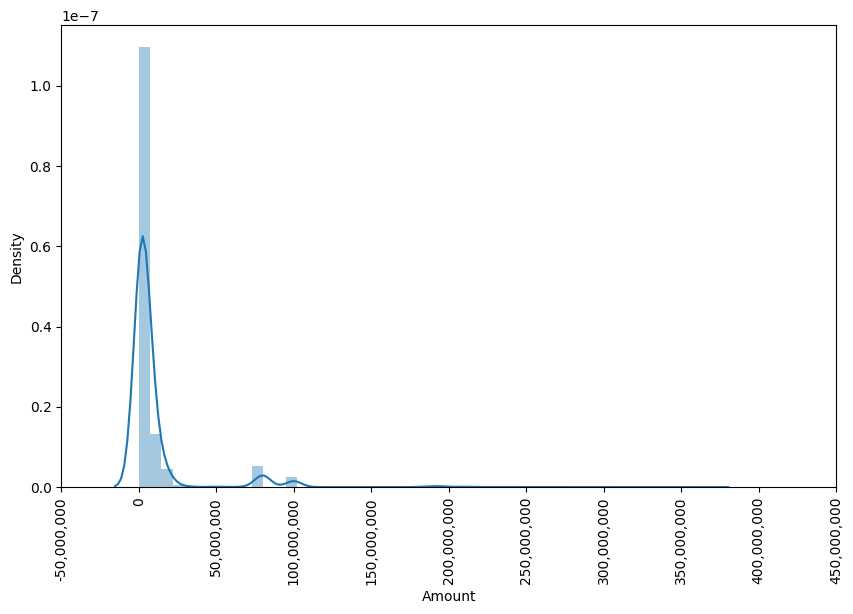

In [69]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the distribution plot
sns.distplot(df['Amount'])

# Get the current tick locations and labels on the x-axis
ticks, labels = plt.xticks()

# Format the tick labels with commas
formatted_labels = [f'{int(label):,}' for label in ticks]

# Set the formatted tick labels on the x-axis
plt.xticks(ticks, formatted_labels)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90) 

# Display the plot
plt.show()

- Skewed to the right
- Bell shaped
- Outliers present

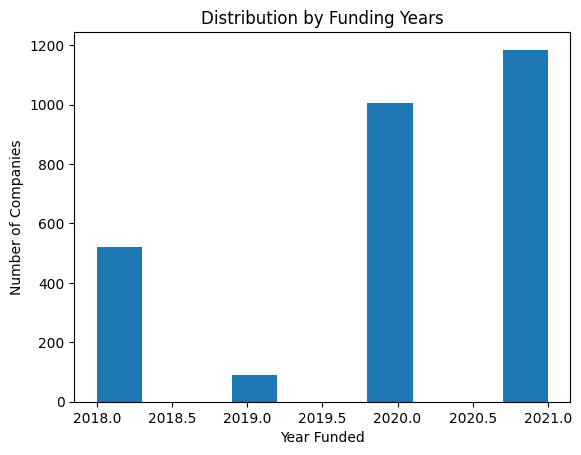

In [70]:
# 3. Year Funded
plt.hist(df['Year Funded'])
plt.xlabel('Year Funded')
plt.ylabel('Number of Companies')
plt.title('Distribution by Funding Years')
plt.show()

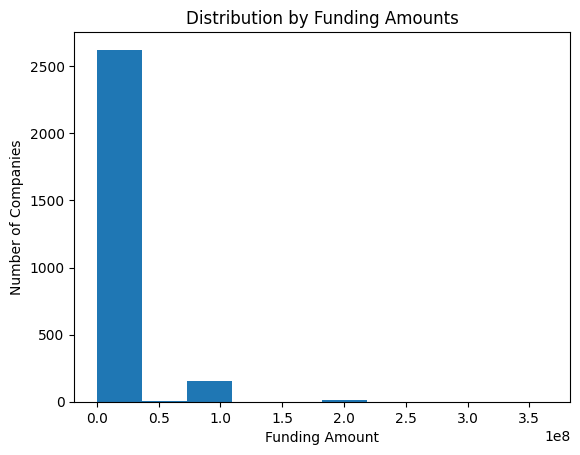

In [71]:
# 4. Funding Amount
# Distribution of funding amount (Histogram)
plt.hist(df['Amount'])  # Histogram (consider log scale for skewed data)
plt.xlabel('Funding Amount')
plt.ylabel('Number of Companies')
plt.title('Distribution by Funding Amounts')
plt.show()

def format_number(number):
  """Formats a number with commas and one decimal place using f-strings."""
  return f"{number:,.0f}"

In [72]:
# Apply formatting function to groupby results
print(f"Average Funding by Year: \n{df.groupby('Year Funded')['Amount'].mean().apply(format_number)}")
print(f"Average Funding by Industry: \n{df.groupby('Industry')['Amount'].mean().apply(format_number)}")

Average Funding by Year: 
Year Funded
2018    12,541,903
2019    10,913,884
2020     9,315,244
2021     8,626,050
Name: Amount, dtype: object
Average Funding by Industry: 
Industry
Agriculture and Food            10,325,380
Consumer Goods                   3,868,879
E-Commerce and Retail           11,262,932
Education                        8,556,808
Energy and Environment          22,165,736
Finance and FinTech             11,640,232
Healthcare and Wellness          7,462,445
Industrial and Manufacturing     8,187,837
Marketing and Advertising        5,601,843
Media and Entertainment          4,428,638
Professional Services           12,250,186
Real Estate and Construction    15,752,071
Technology                       6,671,339
Transportation and Mobility     14,747,749
Name: Amount, dtype: object


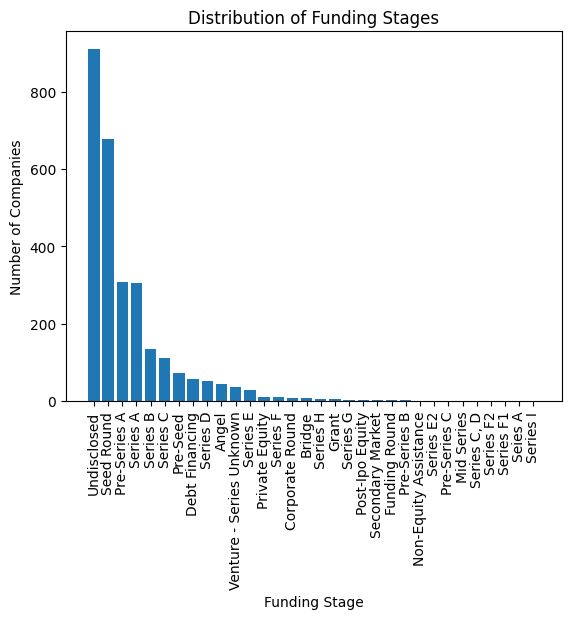

In [73]:
# 5. Funding Stage
plt.bar(df['Funding Stage'].value_counts().index, df['Funding Stage'].value_counts().values)
plt.xlabel('Funding Stage')
plt.ylabel('Number of Companies')
plt.title('Distribution of Funding Stages')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

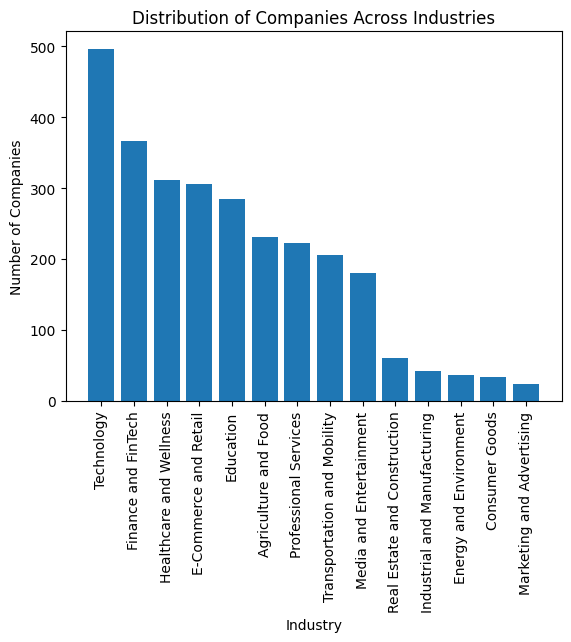

In [74]:
# 7. Industry
plt.bar(df['Industry'].value_counts().index, df['Industry'].value_counts().values)
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies Across Industries')
plt.xticks(rotation = 90)  # Rotate x-axis labels for better readability with many industries
plt.show()

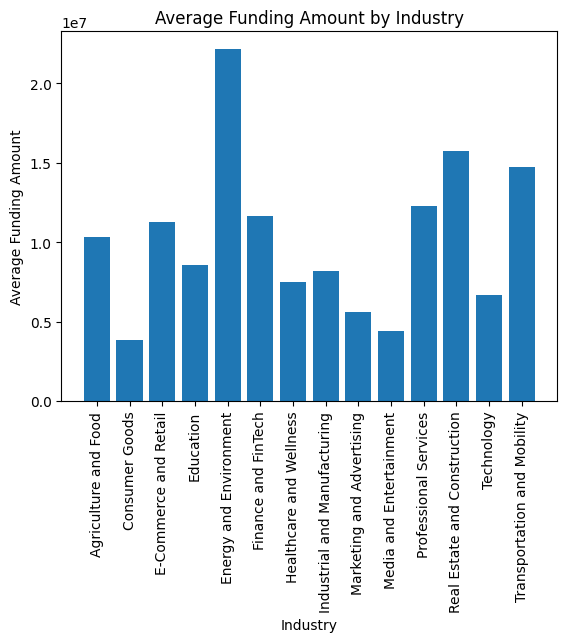

In [75]:
# Funding by Industry
# Group by industry and calculate mean/median funding
industry_stats = df.groupby('Industry')['Amount'].agg(['mean', 'median'])

# Bar chart for average funding per industry
plt.bar(industry_stats.index, industry_stats['mean'])
plt.xlabel('Industry')
plt.ylabel('Average Funding Amount')
plt.title('Average Funding Amount by Industry')
plt.xticks(rotation = 90)  # Rotate x-axis labels for better readability
plt.show()

#### Correlation Matrix

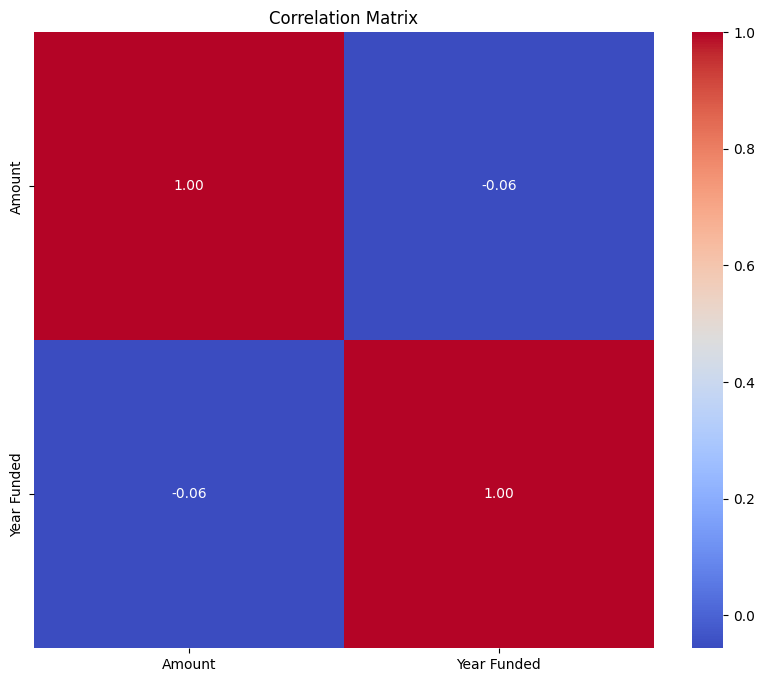

In [76]:
# Exclude non-numeric columns
numeric_df = df.drop(columns=['Company Name', 'Investor', 'Location', 'Industry', 'Funding Stage'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Outlier Detection

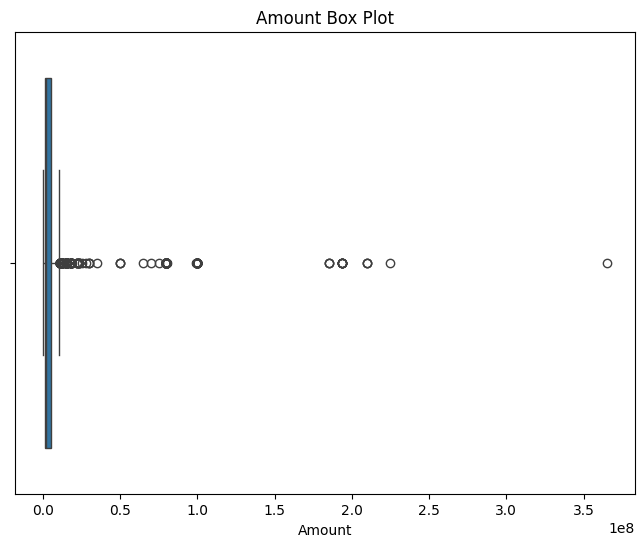

In [77]:
# Use a box plot to visualize the outliers
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Amount'])
plt.title('Amount Box Plot')
plt.xlabel('Amount')
plt.show()

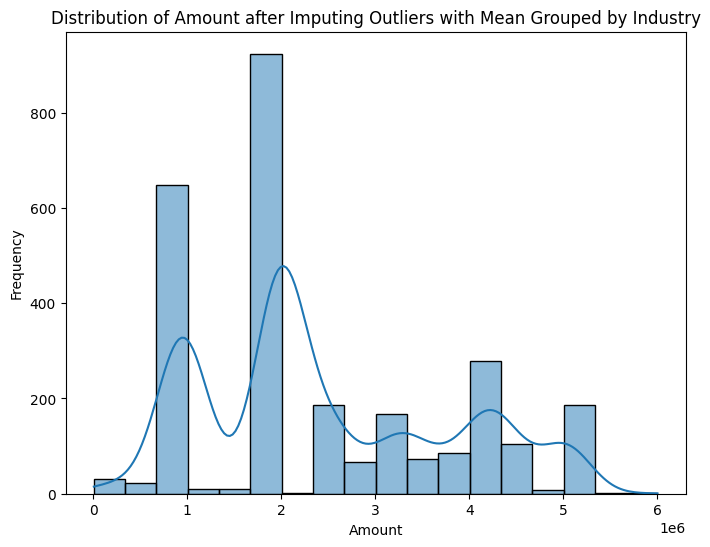

In [82]:
# Group by 'Industry' and calculate the mean of 'Amount' for each group
industry_mean_amount = df.groupby('Industry')['Amount'].transform('mean')

# Replace outliers with the mean value grouped by industry
df['Amount'] = np.where(df['Amount'] > 1.5 * industry_mean_amount, industry_mean_amount, df['Amount'])

# Visualize the distribution after imputing outliers with mean grouped by industry
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Amount after Imputing Outliers with Mean Grouped by Industry')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

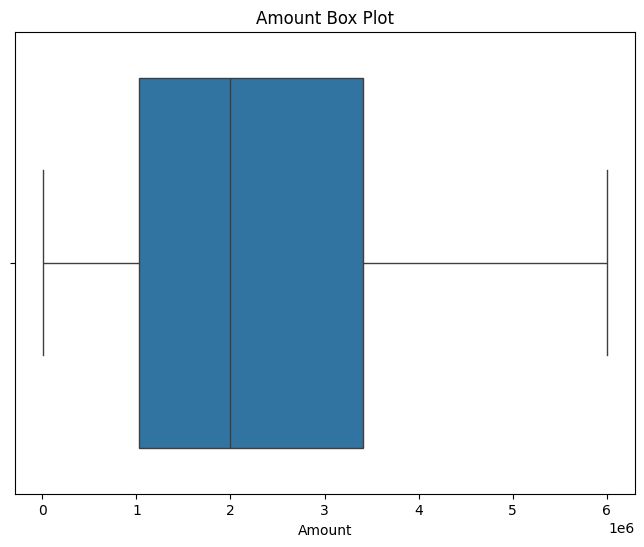

In [83]:
# Use a box plot to visualize the outliers
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Amount'])
plt.title('Amount Box Plot')
plt.xlabel('Amount')
plt.show()

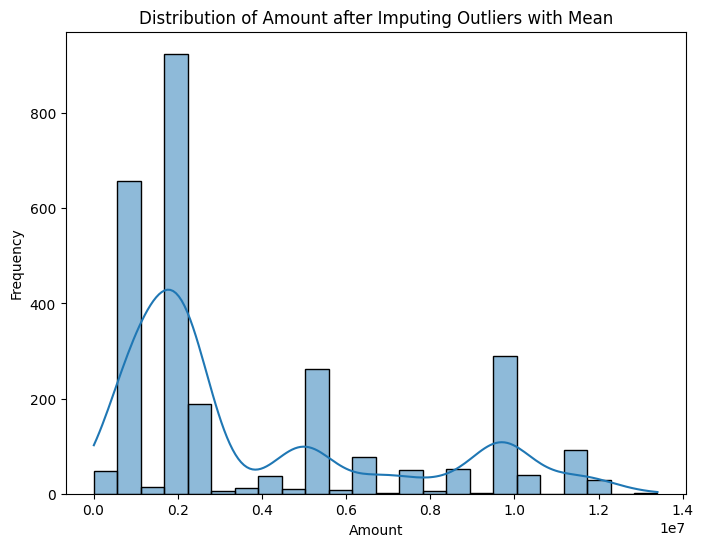

In [79]:
# Calculate the mean of the 'Amount' column
mean_amount = np.mean(df['Amount'])

# Replace outliers with the mean value
df['Amount'] = np.where(df['Amount'] > 1.5 * mean_amount, mean_amount, df['Amount'])

# Visualize the distribution after imputing outliers with mean
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Amount after Imputing Outliers with Mean')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [84]:
# Identify outliers within the Amount column (using IQR)
KQ1 = df['Amount'].quantile(0.25)  # Calculate 1st quartile of 'Amount'
KQ3 = df['Amount'].quantile(0.75)  # Calculate 3rd quartile of 'Amount'
KIQR = KQ3 - KQ1  # Calculate Interquartile Range

# Identify outliers using IQR
outliersk = df[(df['Amount'] < (KQ1 - 1.5 * KIQR)) | (df['Amount'] > (KQ3 + 1.5 * KIQR))]
print(f"Number of outliers: {len(outliersk)}")

Number of outliers: 0


#### Year Funded

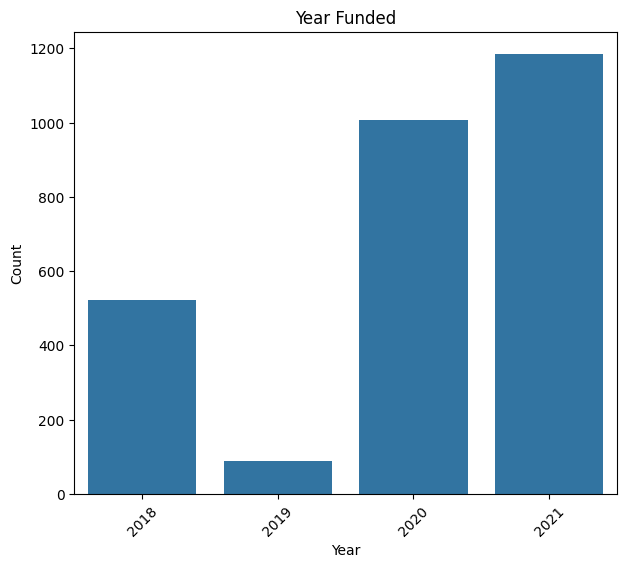

In [85]:
plt.figure(figsize = (7, 6))
sns.countplot(x = 'Year Funded', data = df)
plt.title('Year Funded')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45) # Rotate the x-axis for better visibility
plt.show()

#### Funding Stage

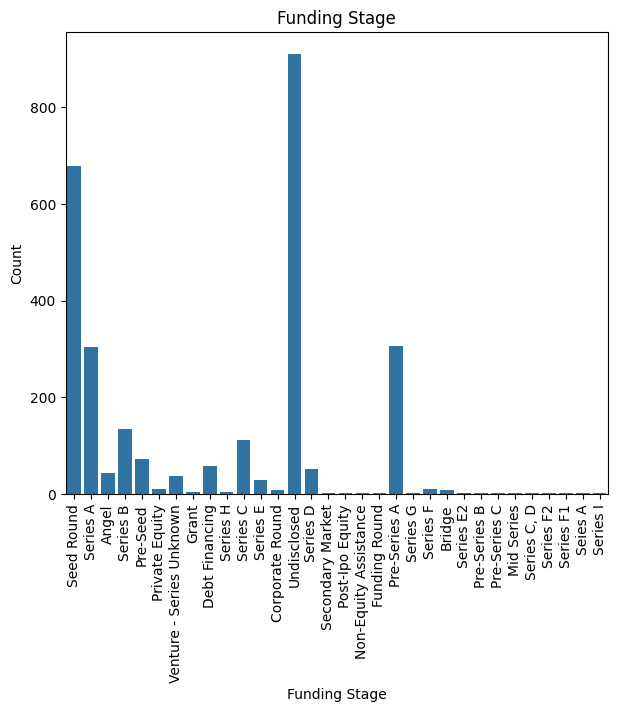

In [86]:
plt.figure(figsize = (7, 6))
sns.countplot(x = 'Funding Stage', data = df)
plt.title('Funding Stage')
plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.xticks(rotation = 90) # Rotate the x-axis for better visibility
plt.show()

#### Year against Average Amount

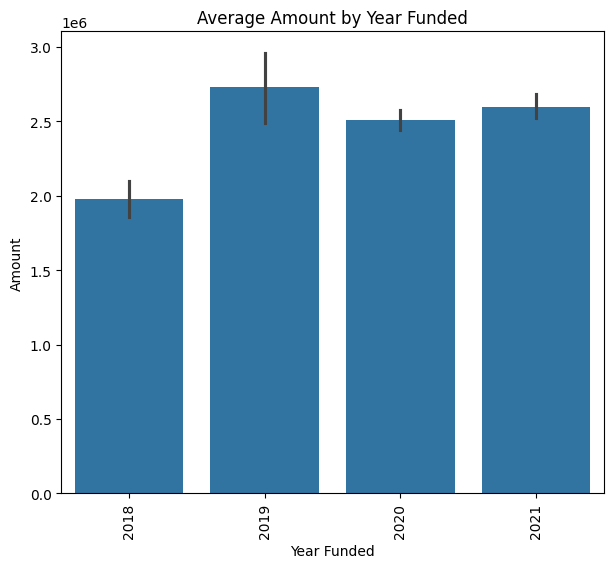

In [87]:
plt.figure(figsize = (7, 6))
sns.barplot(x = 'Year Funded', y = 'Amount', data = df)
plt.title('Average Amount by Year Funded')
plt.xlabel('Year Funded')
plt.ylabel('Amount')
plt.xticks(rotation = 90) 
plt.show()

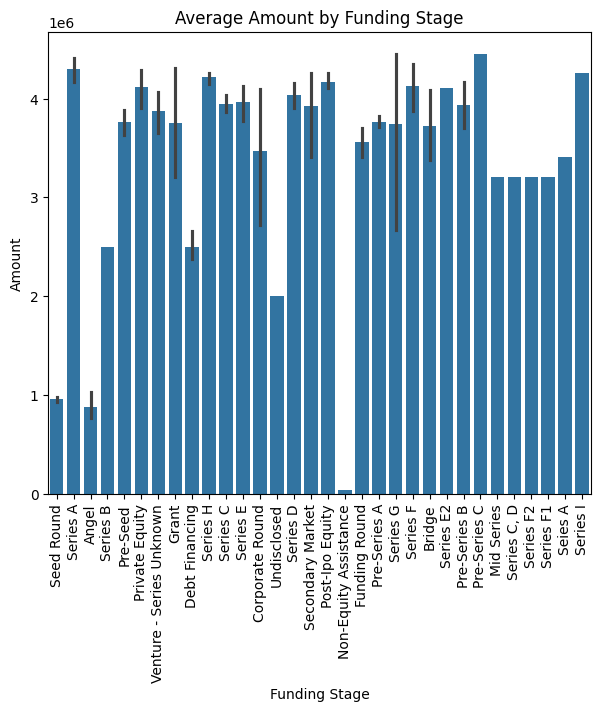

In [89]:
plt.figure(figsize = (7, 6))
sns.barplot(x = 'Funding Stage', y = 'Amount', data = df)
plt.title('Average Amount by Funding Stage')
plt.xlabel('Funding Stage')
plt.ylabel('Amount')
plt.xticks(rotation = 90) 
plt.show()

<Axes: xlabel='Year Funded', ylabel='Count'>

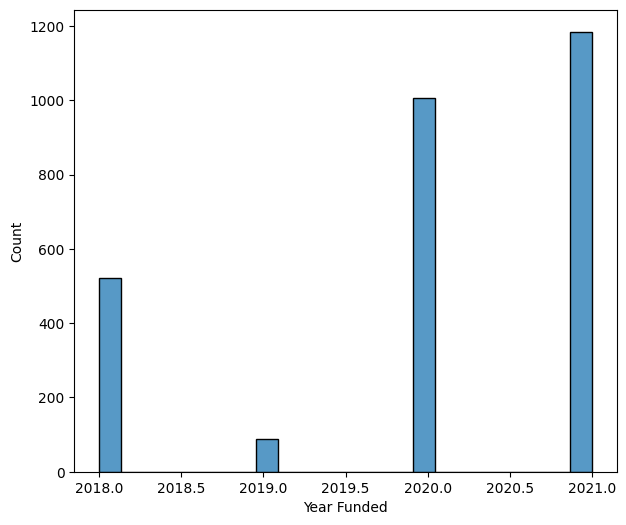

In [90]:
plt.figure(figsize = (7, 6))
sns.histplot(data = df, x = 'Year Funded')

- More data in 2020 and 2021?????

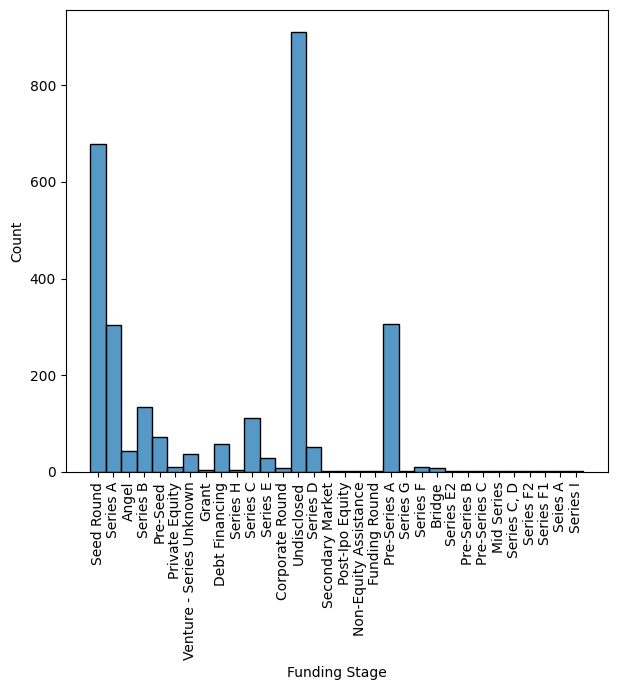

In [91]:
plt.figure(figsize = (7, 6))
sns.histplot(data = df, x = 'Funding Stage')
plt.xticks(rotation = 90)
plt.show()

#### Univariate Analysis

#### Bivariate Analysis

#### Multivariate Analysis

#### Correlation Matrix and Heatmap

### Analytical Questions

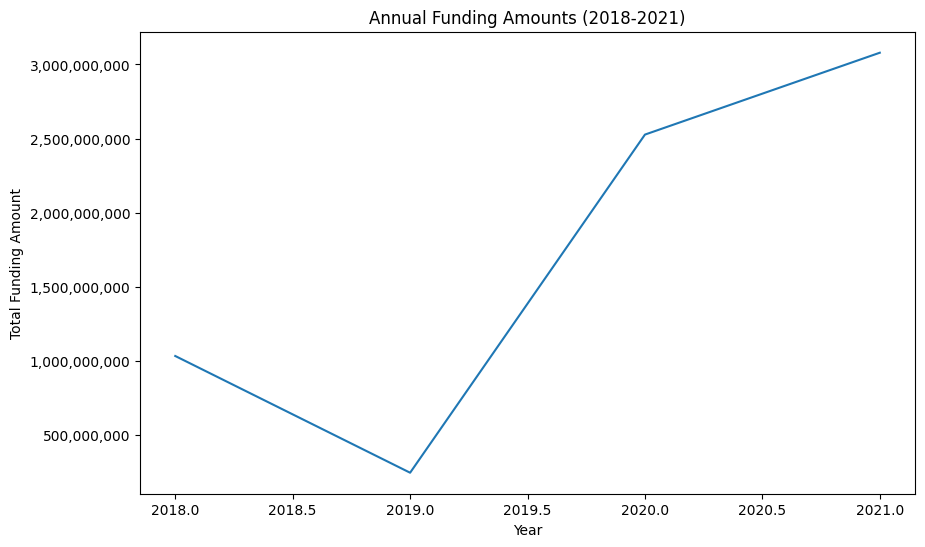

In [93]:
# 1. Trends and patterns in funding amounts from 2018 to 2021
# Aggregating funding amounts by year
annual_funding = df.groupby('Year Funded')['Amount'].sum().reset_index()

# Plotting annual trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_funding, x='Year Funded', y='Amount')
plt.title('Annual Funding Amounts (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')

# Formatting the y-axis labels
ax = plt.gca()
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.show()

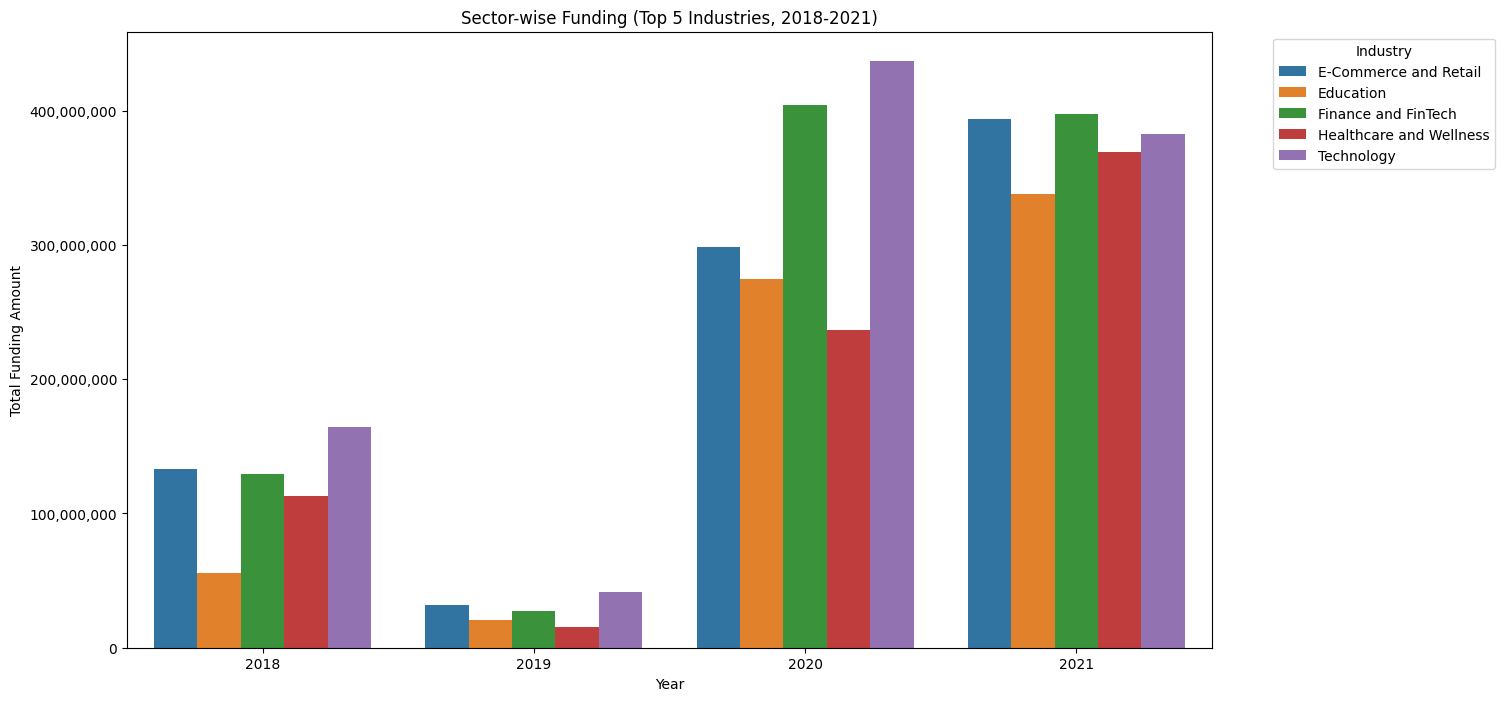

In [94]:
# 2. Sector-wise funding and changes over time
# Aggregating total funding amounts by industry
total_funding_by_industry = df.groupby('Industry')['Amount'].sum().reset_index()

# Sorting to get the top 5 industries
top_5_industries = total_funding_by_industry.sort_values(by='Amount', ascending=False).head(5)['Industry']

# Filtering the original DataFrame to include only the top 5 industries
top_5_sector_funding = df[df['Industry'].isin(top_5_industries)]

# Aggregating funding amounts by year and industry for the top 5 industries
sector_funding = top_5_sector_funding.groupby(['Year Funded', 'Industry'])['Amount'].sum().reset_index()

# Plotting sector-wise funding over years for the top 5 industries
plt.figure(figsize=(14, 8))
sns.barplot(data=sector_funding, x='Year Funded', y='Amount', hue='Industry')
plt.title('Sector-wise Funding (Top 5 Industries, 2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')

# Formatting the y-axis labels
ax = plt.gca()
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.show()

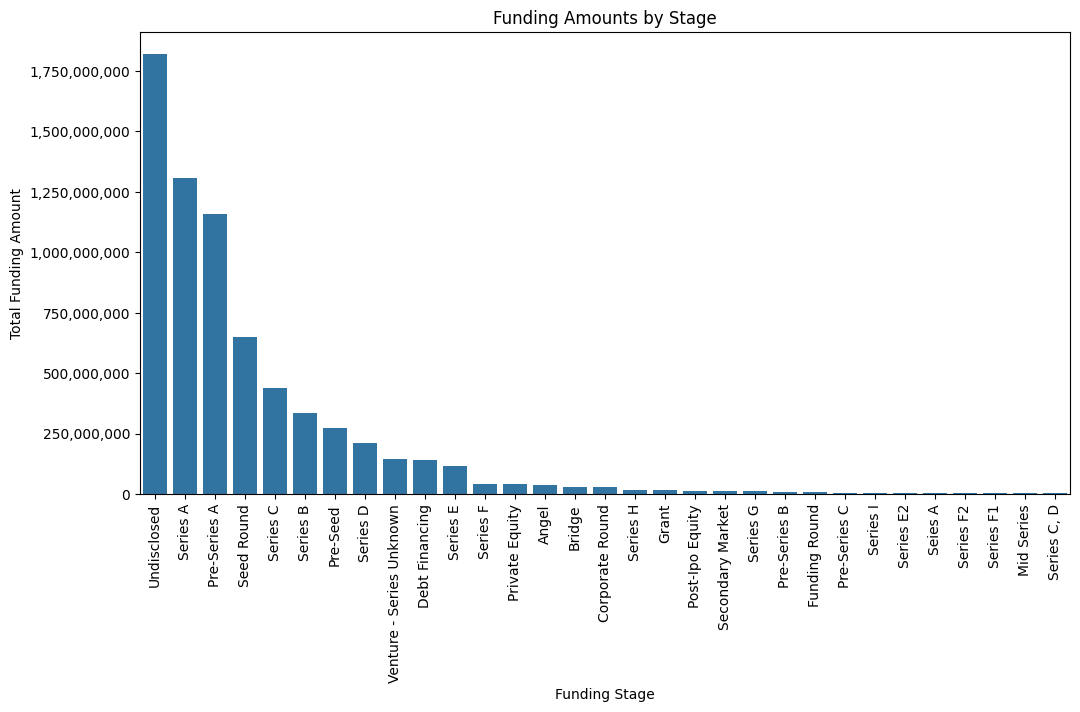

In [95]:
# 3. Distribution of funding across different stages
# Aggregating funding amounts by funding stage
stage_funding = df.groupby('Funding Stage')['Amount'].sum().reset_index()

# Filtering out stages with no funding
stage_funding = stage_funding[stage_funding['Amount'] > 500000]

# Plotting funding amounts by stage
plt.figure(figsize=(12, 6))
sns.barplot(data=stage_funding, x='Funding Stage', y='Amount', order=stage_funding.sort_values('Amount', ascending=False)['Funding Stage'])
plt.title('Funding Amounts by Stage')
plt.xlabel('Funding Stage')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=90)

# Formatting the y-axis labels
ax = plt.gca()
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.show()

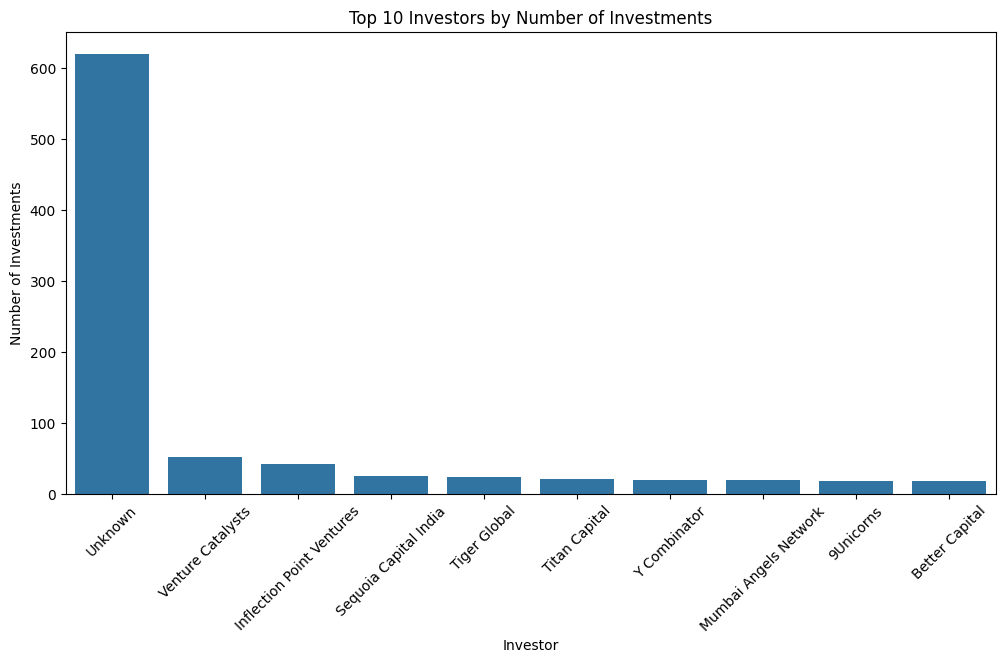

In [96]:
# 4. Key investors and their investment behaviors
# Counting investments by each investor
investor_counts = df['Investor'].value_counts().reset_index()
investor_counts.columns = ['Investor', 'Investment Count']

# Plotting the top 10 investors
plt.figure(figsize=(12, 6))
sns.barplot(data=investor_counts.head(10), x='Investor', y='Investment Count')
plt.title('Top 10 Investors by Number of Investments')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45)
plt.show()

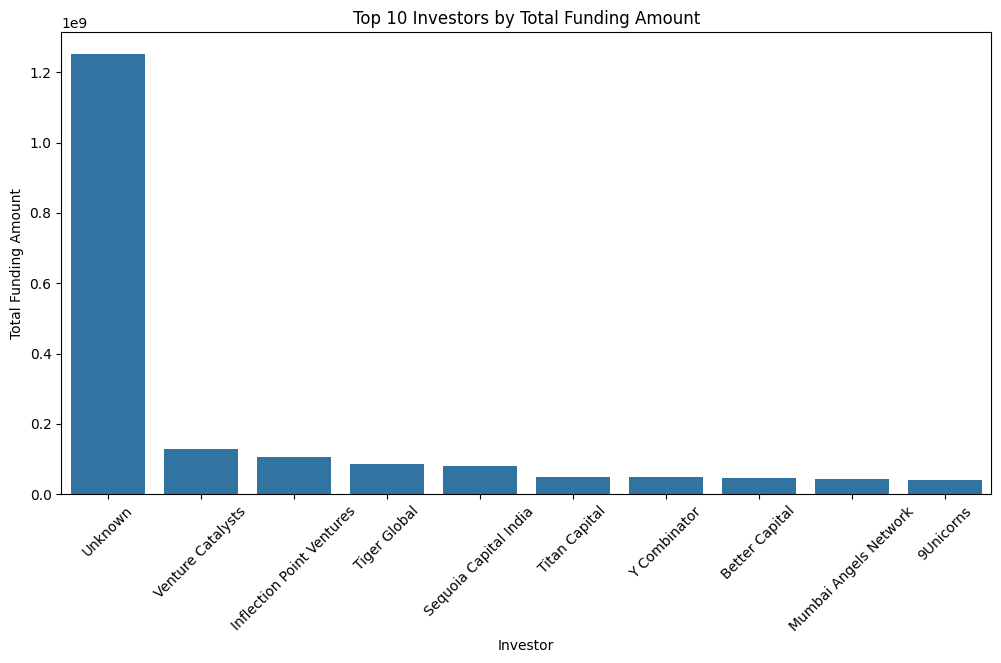

In [97]:
# 4. Key investors and their investment behaviors
# Aggregating funding amounts by investor
investor_funding = df.groupby('Investor')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Plotting the top 10 investors by total funding amount
plt.figure(figsize=(12, 6))
sns.barplot(data=investor_funding.head(10), x='Investor', y='Amount')
plt.title('Top 10 Investors by Total Funding Amount')
plt.xlabel('Investor')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()

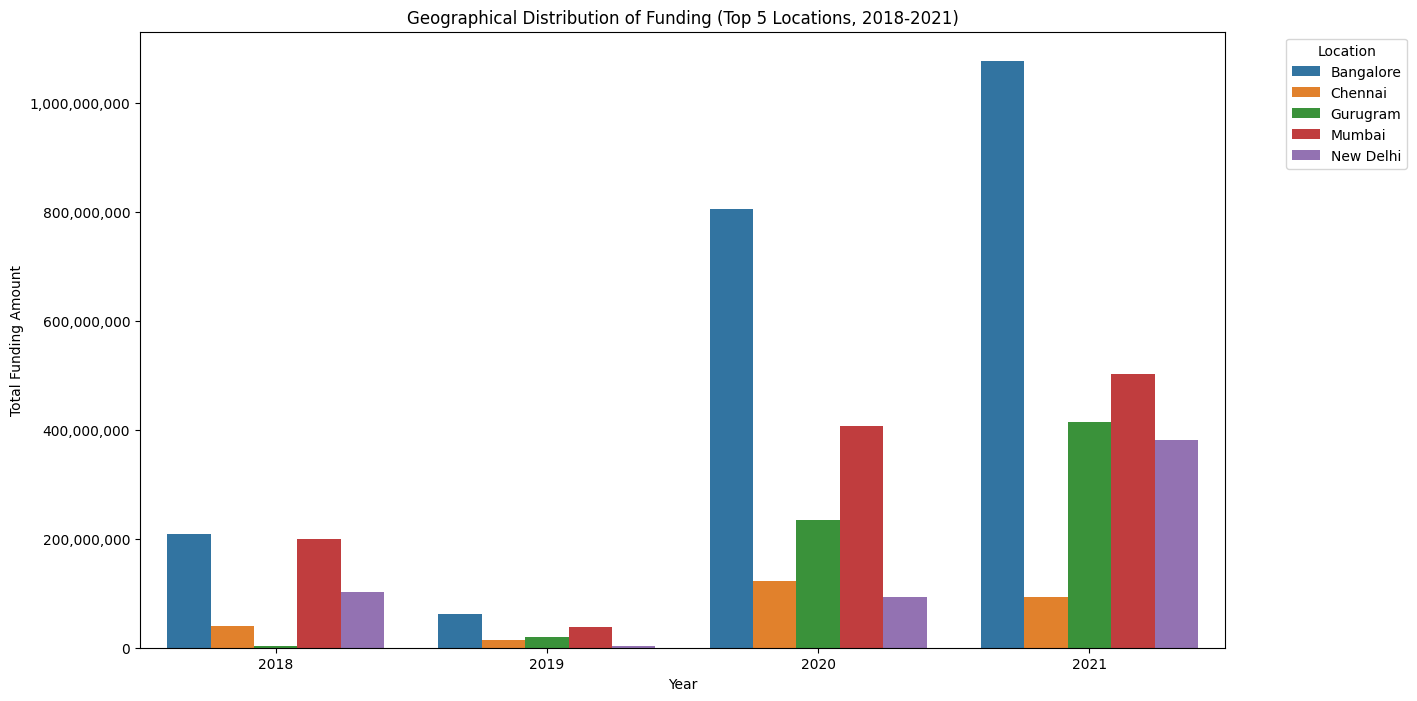

In [98]:
# 5. Geographical distribution of startup funding
# Aggregating total funding amounts by location
total_funding_by_location = df.groupby('Location')['Amount'].sum().reset_index()

# Sorting to get the top 5 locations
top_5_locations = total_funding_by_location.sort_values(by='Amount', ascending=False).head(5)['Location']

# Filtering the original DataFrame to include only the top 5 locations
top_5_geo_funding = df[df['Location'].isin(top_5_locations)]

# Aggregating funding amounts by year and location for the top 5 locations
geo_funding = top_5_geo_funding.groupby(['Year Funded', 'Location'])['Amount'].sum().reset_index()

# Plotting geographical distribution over years for the top 5 locations
plt.figure(figsize=(14, 8))
sns.barplot(data=geo_funding, x='Year Funded', y='Amount', hue='Location')
plt.title('Geographical Distribution of Funding (Top 5 Locations, 2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Formatting the y-axis labels
ax = plt.gca()
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.show()